In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Loading Dataset

In [2]:
df = pd.read_csv("../data/dc_bikes_new.csv", index_col=0, parse_dates=["datetime"])

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,night
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,night


### Selecting Windspeed column and accumulating sample means

In [3]:
wind_spd = df["windspeed"]

In [4]:
sample_means = []

for i in range(10_000) :
    bootstrap_sample = wind_spd.sample(n=100, replace=True)
    sample_means.append(bootstrap_sample.mean())

In [5]:
sample_means

[13.080477,
 13.810442,
 12.720285000000004,
 13.320203,
 13.440334,
 13.720059,
 11.860206,
 13.650245,
 12.800283000000002,
 12.750635999999997,
 13.020244,
 11.230540000000001,
 13.280338000000004,
 12.810266000000002,
 13.320471,
 12.970396000000001,
 13.150223999999998,
 13.050327000000003,
 13.840257000000001,
 12.419991,
 12.870364999999998,
 13.230222000000003,
 11.520248000000002,
 11.920573000000001,
 12.920213,
 12.280162000000002,
 11.220356000000002,
 12.220398,
 12.210616,
 10.910548,
 13.700361000000001,
 11.870524,
 10.700570000000003,
 13.160408,
 12.440291999999998,
 10.26038,
 12.740318,
 12.080502,
 11.750192,
 12.070050000000002,
 11.900406,
 13.410318000000002,
 12.640287000000002,
 11.210239000000001,
 13.810442000000002,
 11.610363,
 11.960438,
 13.790542999999998,
 12.130283000000004,
 14.170164999999997,
 13.020244,
 11.990119,
 13.18024,
 11.960438000000003,
 12.470374999999999,
 11.930288000000001,
 12.310445999999999,
 13.600396999999997,
 12.660387,
 12.57

### Plotting with displot

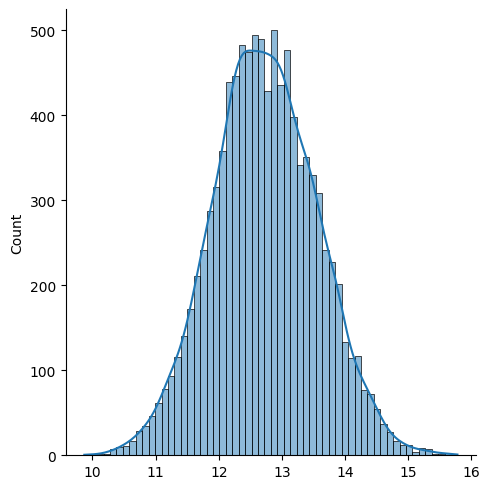

In [6]:
sns.displot(sample_means, kde = True)

### Determining Confidence Interval of Average wind speed 

In [7]:

alpha = 0.95

lower_quantile = (1-alpha)/2  

upper_quantile = alpha + ((1-alpha)/2)



In [8]:
sample_means_series = pd.Series(sample_means)


lower_limit = sample_means_series.quantile(lower_quantile)

upper_limit = sample_means_series.quantile(upper_quantile)

print(f'The Confidence Interval of the average wind speed is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average wind speed is between 11.150272325000001 and 14.370092999999997


### Determining  Confidence Interval using the z-value formula

In [9]:
sample_mean = wind_spd.mean()


sample_std = wind_spd.std()

In [10]:
sample_mean

12.736539622532941

In [11]:
sample_std

8.196795314376963

In [12]:
# alpha = 0.95, then z = 1.96

z = 1.96
n = 100

lower_limit_eq = sample_mean - (   (z *sample_std)   /   np.sqrt(n)  )
upper_limit_eq = sample_mean + (   (z *sample_std)   /   np.sqrt(n)  )

print(f'Calculated Confidence Interval(using z value) of the average wind speed  is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval(using z value) of the average wind speed  is between 11.129967740915056 and 14.343111504150826
